In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm 
import numpy as np
import pandas as pd
from scipy.integrate import cumtrapz
from scipy.integrate import cumulative_trapezoid
from tqdm import tqdm

In [2]:
ds = xr.open_dataset(r'../data/amazon2.nc')
ds_w = xr.open_dataset(r'w_mean.nc')

In [3]:
print(ds_w)
print(ds)

<xarray.Dataset>
Dimensions:    (depth: 49, latitude: 176, longitude: 198)
Coordinates:
  * depth      (depth) float32 1.018 2.094 3.233 ... 5.054e+03 5.501e+03
  * latitude   (latitude) float32 -3.625 -3.542 -3.458 ... 10.79 10.88 10.96
  * longitude  (longitude) float32 -57.71 -57.62 -57.54 ... -41.46 -41.37 -41.29
    time       datetime64[ns] ...
Data variables:
    w_mean     (depth, latitude, longitude) float32 ...
<xarray.Dataset>
Dimensions:    (time: 10, depth: 50, latitude: 177, longitude: 199)
Coordinates:
  * time       (time) datetime64[ns] 2021-06-01 2021-06-02 ... 2021-06-10
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 -3.667 -3.583 -3.5 -3.417 ... 10.83 10.92 11.0
  * longitude  (longitude) float32 -57.75 -57.67 -57.58 ... -41.42 -41.33 -41.25
Data variables:
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:

In [26]:
u=ds.uo.isel(time=0,longitude=slice(98,100),latitude=slice(98,100))
v=ds.vo.isel(time=0,longitude=slice(98,100),latitude=slice(98,100))
w=ds_w.w_mean.isel(longitude=slice(98,100),latitude=slice(98,100))

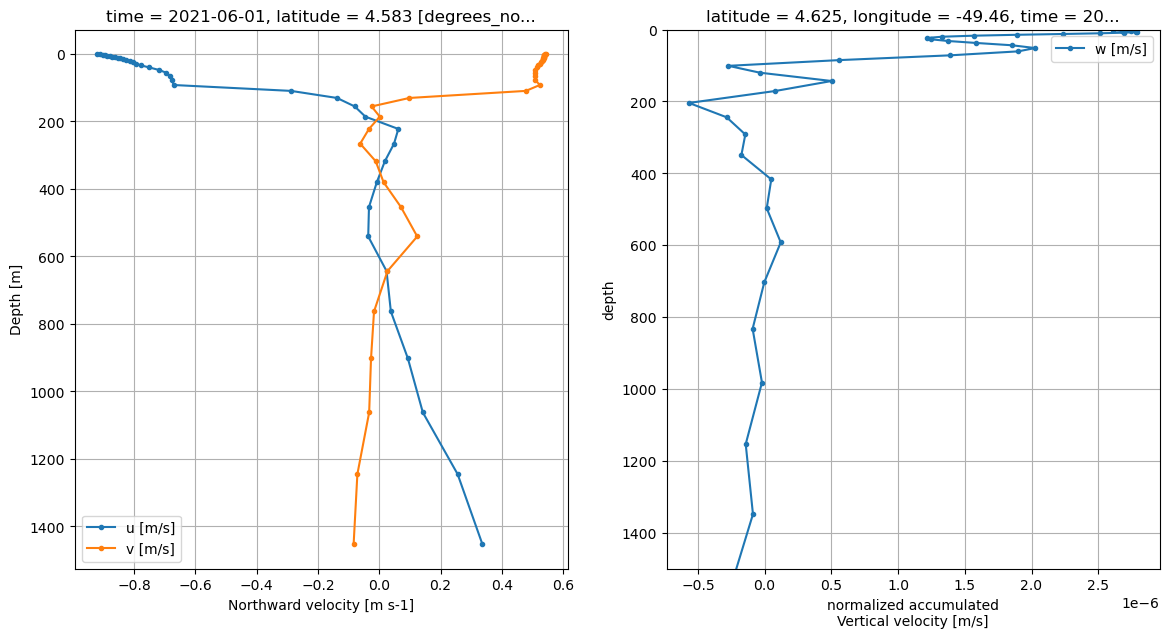

In [27]:
fig,ax = plt.subplots(1,2,figsize=(14,7))

u.isel(longitude=1,latitude=1).plot(y='depth',marker='.',label='u [m/s]',ax=ax[0])
v.isel(longitude=1,latitude=1).plot(y='depth',marker='.', label='v [m/s]',ax=ax[0])
ax[0].invert_yaxis()
ax[0].grid('minor')
ax[0].legend()
# ax[0].set_title("U and V profile")

w.isel(longitude=1,latitude=1).plot(y='depth',marker='.', label='w [m/s]',ax=ax[1])
ax[1].set_ylim(0,1500)
ax[1].invert_yaxis()
ax[1].grid('minor')
ax[1].legend()
# ax[1].set_title("W profile")

plt.legend()

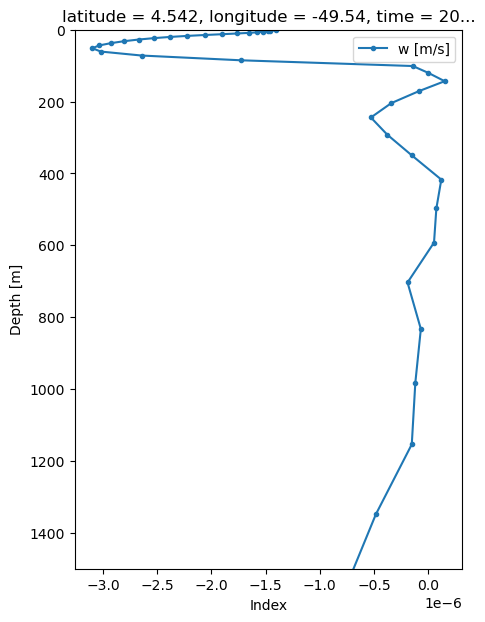

In [24]:
# Create the plot and capture the axis object
fig, ax = plt.subplots(figsize=(5, 7))
w.isel(longitude=1, latitude=1).plot(y='depth', marker='.', label='w [m/s]')
# Set limits and invert y-axis
ax.set_ylim(1500,0)  # Instead of using plt.ylim
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time' if 'time' in w.dims else 'Index')
ax.legend()

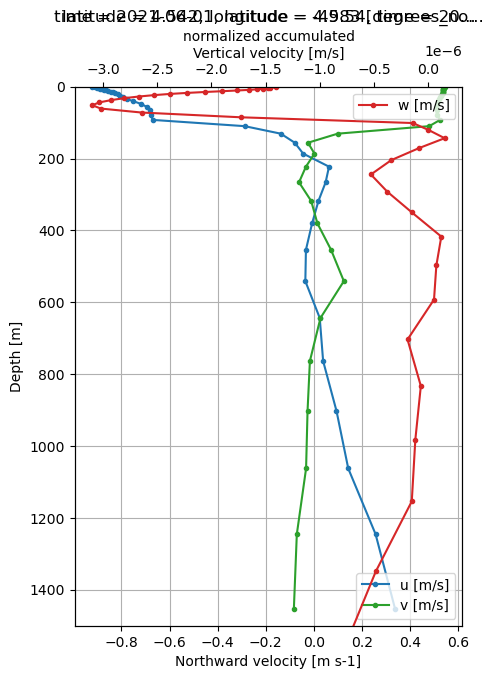

In [11]:
fig, ax = plt.subplots(figsize=(5, 7))

# Eje inferior: u y v
u.isel(longitude=1, latitude=1).plot(
    y='depth', marker='.', label='u [m/s]', ax=ax, color='tab:blue'
)
v.isel(longitude=1, latitude=1).plot(
    y='depth', marker='.', label='v [m/s]', ax=ax, color='tab:green'
)
ax.set_ylim(0,1500)
ax.invert_yaxis()
ax.grid('minor')
ax.legend(loc='lower right')
# ax.set_title("Profiles of u, v and w")

# Eje superior: w
ax2 = ax.twiny()
w.isel(longitude=1, latitude=1).plot(
    y='depth', marker='.', label='w [m/s]', ax=ax2, color='tab:red'
)

# Ejes bien alineados
# ax2.set_xlabel("w [m/s]")
ax2.legend(loc='upper right')


In [21]:
df = pd.DataFrame({
    "depth [m]": ds.depth.data,
    "u [m/s]": u.isel(longitude=1, latitude=1).data,
    "v [m/s]": v.isel(longitude=1, latitude=1).data,
    "w[m/s]": w.isel(longitude=1, latitude=1).data,
})
df
# print(u.isel(longitude=1, latitude=1).data)
# print(w.isel(lon=1, lat=1).data)

ValueError: All arrays must be of the same length